In [54]:
!pip install pandas nltk wordcloud


Defaulting to user installation because normal site-packages is not writeable


In [55]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

# 载入数据，假设数据在CSV文件中，有一个名为 'text' 的列包含文本数据
df = pd.read_csv('1105.csv') 
print(df['text'])

# 合并所有文本数据为一个字符串
text = ' '.join(df['text'])

0     被聯合國教科文組織（UNESCO）所認定的「世界遺產」，是大自然或人類文明的精華，而且被肯認...
1     但你是否想過，這些令人讚嘆的世界遺產是如何被公認，並進一步地保存下來呢？在這個認證與保存的過...
2                                             世界文化遺產委員會
3     目前全世界共有 194 個國家簽訂了《保護世界文化和自然遺產公約》，承諾保護珍貴的自然與文明...
4     每年，都有許多國家提交申請，希望讓自己國內的自然與文化特色成為世界遺產。而 WHC 每年都會...
                            ...                        
67    27. 西班牙：安達盧西亞橄欖林景觀（The Olive Grove Landscapes ...
68    28. 塔吉克共和國：蒂格羅瓦亞巴爾卡自然保護區（Tugai Forests of the ...
69    29. 印尼：日惹古城（Historical city of Yogyakarta）日惹城是...
70    30. 希臘：群山後的土地—平杜斯國家公園（Zagorochoria – North Pin...
71    群山後的土地是一片遺世獨立的地方，溪流眾多並依據其中的河流切割分為 4 個聚落。聚落人們以畜...
Name: text, Length: 72, dtype: object


In [56]:
import re

# 指定需要删除的符号，以逗号和句号为例
symbols_to_remove = ['，', '.','（','）','！','、','「','」','：','？','。','-','／']

words_to_remove = ["的","在","與","等","和","被","是","中","上","於","又","有","不","也","就","為","此","其","了","個","都","之","一","從","而","著","人","可以","由","年","例如"]

# 创建一个函数来删除符号
def remove_symbols(text):
    for symbol in symbols_to_remove:
        text = text.replace(symbol, '')
    return text

def remove_words(text):
    for word in words_to_remove:
        text = text.replace(word, '')
    return text

# 创建一个函数来删除文本中的所有数字
def remove_numbers(text):
    text_without_numbers = re.sub(r'\d+', '', text)
    return text_without_numbers

def remove_english_words(text):
    text_without_english_words = re.sub(r'[a-zA-Z]+', '', text)
    return text_without_english_words

# 在 'text' 列上应用函数来删除符号
df['text'] = df['text'].apply(remove_symbols)

df['text'] = df['text'].apply(remove_words)

df['text'] = df['text'].apply(remove_numbers)

df['text'] = df['text'].apply(remove_english_words)
# 打印处理后的数据框
print(df)

                                                 text
0   聯合國教科文組織所認定世界遺產大自然或類文明精華且肯認具傑出普世價值值得全類去理解保存如神秘...
1   但你否想過這些令讚嘆世界遺產如何公認並進步地保存下來呢這認證保存過程世界遺產委員會以下簡稱 ...
2                                           世界文化遺產委員會
3   目前全世界共  國家簽訂《保護世界文化自然遺產公約》承諾保護珍貴自然文明遺產並  締約國組成...
4   每許多國家提交申請希望讓自己國內自然文化特色成世界遺產  每會大量申請篩選出少數點成份提名名...
..                                                ...
67   西班牙安達盧西亞橄欖林景觀     類橄欖樹榨油技術傳統地海文明基礎橄欖林景觀包含多傳統橄...
68   塔吉克共國蒂格羅瓦亞巴爾卡自然保護區      面積廣大保護區共  平方公里蘊含豐富河岸森...
69   印尼日惹古城   日惹城蘇丹國心建  世紀典型爪哇城市且城市布局反映出爪哇宇宙觀哲學因爪哇...
70                              希臘群山後土地—平杜斯國家公園 –    
71  群山後土地片遺世獨立地方溪流眾多並依據河流切割分  聚落聚落們以畜牧業林業農業主過自給自足生...

[72 rows x 1 columns]


In [57]:
!pip install jieba


Defaulting to user installation because normal site-packages is not writeable


In [58]:
import jieba

# 合并所有处理后的文本数据为一个字符串
text = ' '.join(df['text'])

# 中文分词
seg_list = jieba.cut(text, cut_all=False)

# 将分词结果转换为字符串
segmented_text = ' '.join(seg_list)

# 打印精简后的中文文本
print(segmented_text)


聯合國 教科文 組織 所 認定 世界 遺產 大自然 或類 文明 精華且 肯認 具傑出 普世價值 值得 全類 去 理解 保存 如 神秘 埃及 金字塔 震撼 國萬里長 城絕 美 印度 泰姬 瑪哈陵 珍貴 文化 遺產 讓 我們 得以 跨越 時代見 證前 思想 技藝   但 你 否想過 這些 令 讚 嘆 世界 遺產 如何 公認 並進步 地 保存 下來 呢 這認證 保存 過程 世界 遺產委員會 以下 簡稱   重要 組織 具選擇 哪些 文化 列 世界 遺產 權力   世界 文化 遺產委員會   目前 全世界 共     國家 簽訂 《 保護 世界 文化 自然 遺產公約 》 承諾 保護 珍貴 自然 文明 遺產並     締約國 組成 世界 遺產委員會 負責 選定 哪些 地點 列入 世界 遺產名 單審核 世界 遺產 基金 資金 使用 ； 且 每委員國 任期     定期 遴選 這 增加     公信力   每許 多國家 提交 申請 希望 讓 自己 國內 自然 文化 特色 成 世界 遺產     每會 大量 申請 篩選 出少 數點 成份 提名 名單 名錄 因 這份 提名 名單 但 萬眾 矚目 已份 殊榮 本文 將逐 讀者 介紹 各 遺產 重點 精華     世界 遺產 提名 名單     德國 阿爾 卑斯山 草地 濕地 景觀               這地區 西元前     持續 使用 至今 長 期類 自然 互動 成具 豐富 生物 多樣 性棲息 地 河谷 地區 荒地 河流 定期 氾 濫 平原 區歐 西歐 最大 沼澤地區 這裡 農業行 最早 可追溯 至     世紀 條頓 騎士團 擴張 至後發 展出 套 共同 管理 大 草地 制度 類創造 穀 倉 烹飪 營房 打 穀 機加 飼養 牲畜 皆 長 期 融合 後 成 地區 多樣 性景觀     斯洛伐克 烏克蘭德國 喀爾巴阡山脈 古山 毛櫸 森林 擴大           ( )   自次 冰河 時期 結束 以來 歐洲山 毛櫸 森林 便 漸漸 向 外 蔓延 且 仍 持續 展現 出樹種 堅韌 環境 適應力 生命力 喀爾巴阡山脈 古山 卯 櫸 森林 具樹齡 大多 樣性 高樹木 尺寸 高大 範圍 廣大特徵   森林 最早     列 世界 自然 遺產 後 多次 擴大 指定 今 提名 樣 擴大範圍 目前 已 遍布     國家     巴勒斯坦 

In [39]:
from collections import Counter

# 使用空格分隔文本以获取单词列表
words = segmented_text.split()

# 使用Counter计算每个单词的出现次数
word_count = Counter(words)

# 打印重复出现的单词和它们的出现次数
for word, count in word_count.items():
    if count > 1:
        print(f'单词: {word}, 出现次数: {count}')

单词: 組織, 出现次数: 2
单词: 所, 出现次数: 2
单词: 世界, 出现次数: 15
单词: 遺產, 出现次数: 11
单词: 文明, 出现次数: 6
单词: 保存, 出现次数: 6
单词: 如, 出现次数: 2
单词: 埃及, 出现次数: 3
单词: 金字塔, 出现次数: 3
单词: 印度, 出现次数: 4
单词: 珍貴, 出现次数: 2
单词: 文化, 出现次数: 17
单词: 讓, 出现次数: 2
单词: 跨越, 出现次数: 2
单词: 但, 出现次数: 3
单词: 這些, 出现次数: 4
单词: 地, 出现次数: 5
单词: 下來, 出现次数: 2
单词: 過程, 出现次数: 2
单词: 遺產委員會, 出现次数: 3
单词: 重要, 出现次数: 7
单词: 哪些, 出现次数: 2
单词: 列, 出现次数: 2
单词: 目前, 出现次数: 3
单词: 共, 出现次数: 2
单词: 國家, 出现次数: 4
单词: 保護, 出现次数: 2
单词: 自然, 出现次数: 6
单词: 使用, 出现次数: 2
单词: ；, 出现次数: 3
单词: 且, 出现次数: 5
单词: 定期, 出现次数: 2
单词: 這, 出现次数: 3
单词: 申請, 出现次数: 2
单词: 特色, 出现次数: 3
单词: 成, 出现次数: 3
单词: 大量, 出现次数: 4
单词: 提名, 出现次数: 4
单词: 名單, 出现次数: 3
单词: 因, 出现次数: 2
单词: 各, 出现次数: 3
单词: 德國, 出现次数: 3
单词: 草地, 出现次数: 2
单词: 濕地, 出现次数: 2
单词: 景觀, 出现次数: 4
单词: 西元前, 出现次数: 5
单词: 持續, 出现次数: 2
单词: 長, 出现次数: 3
单词: 豐富, 出现次数: 4
单词: 生物, 出现次数: 2
单词: 多樣, 出现次数: 4
单词: 地區, 出现次数: 5
单词: 河流, 出现次数: 3
单词: 最大, 出现次数: 2
单词: 這裡, 出现次数: 4
单词: 最早, 出现次数: 2
单词: 世紀, 出现次数: 13
单词: 展出, 出现次数: 3
单词: 穀, 出现次数: 2
单词: 皆, 出现次数: 2
单词: 融合, 出现次数: 2
单词: 後, 出现次数: 5
单词: 斯洛伐克, 出现次数: 

In [59]:
co_occurrence = {}
for i in range(len(words)):
    for j in range(i+1, len(words)):
        key = tuple(sorted([words[i], words[j]]))
        co_occurrence[key] = co_occurrence.get(key, 0) + 1

In [49]:
co_occurrence

{('教科文', '聯合國'): 1,
 ('組織', '聯合國'): 2,
 ('所', '聯合國'): 2,
 ('聯合國', '認定'): 1,
 ('世界', '聯合國'): 15,
 ('聯合國', '遺產'): 11,
 ('大自然', '聯合國'): 1,
 ('或類', '聯合國'): 1,
 ('文明', '聯合國'): 6,
 ('精華且', '聯合國'): 1,
 ('聯合國', '肯認'): 1,
 ('具傑出', '聯合國'): 1,
 ('普世價值', '聯合國'): 1,
 ('值得', '聯合國'): 1,
 ('全類', '聯合國'): 1,
 ('去', '聯合國'): 1,
 ('理解', '聯合國'): 1,
 ('保存', '聯合國'): 6,
 ('如', '聯合國'): 2,
 ('神秘', '聯合國'): 1,
 ('埃及', '聯合國'): 3,
 ('聯合國', '金字塔'): 3,
 ('聯合國', '震撼'): 1,
 ('國萬里長', '聯合國'): 1,
 ('城絕', '聯合國'): 1,
 ('美', '聯合國'): 1,
 ('印度', '聯合國'): 4,
 ('泰姬', '聯合國'): 1,
 ('瑪陵', '聯合國'): 1,
 ('珍貴', '聯合國'): 2,
 ('文化', '聯合國'): 17,
 ('聯合國', '讓'): 2,
 ('我們', '聯合國'): 1,
 ('得以', '聯合國'): 1,
 ('聯合國', '跨越'): 2,
 ('時代見', '聯合國'): 1,
 ('聯合國', '證前'): 1,
 ('思想', '聯合國'): 1,
 ('技藝', '聯合國'): 1,
 ('但', '聯合國'): 3,
 ('你', '聯合國'): 1,
 ('否想過', '聯合國'): 1,
 ('聯合國', '這些'): 4,
 ('令', '聯合國'): 1,
 ('聯合國', '讚'): 1,
 ('嘆', '聯合國'): 1,
 ('如何', '聯合國'): 1,
 ('公認', '聯合國'): 1,
 ('並進步', '聯合國'): 1,
 ('地', '聯合國'): 5,
 ('下來', '聯合國'): 2,
 ('呢', '聯合國'): 1,
 ('聯合國', 

In [60]:
!pip install wordcloud
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [61]:
from wordcloud import WordCloud

font_path = "C:/Windows/Fonts/mingliu.ttc"
wc = WordCloud(font_path=font_path, background_color="white", max_words=2000, width=800, height=600)
wordcloud = wc.generate_from_frequencies(word_count)

(-0.5, 799.5, 599.5, -0.5)

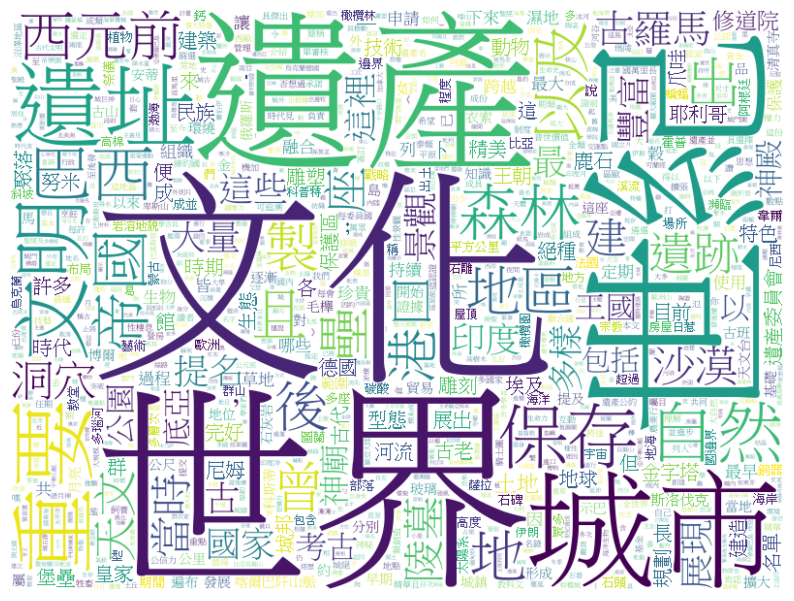

In [42]:
# 显示文字云

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')